In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.datasets import fetch_openml
import time, umap

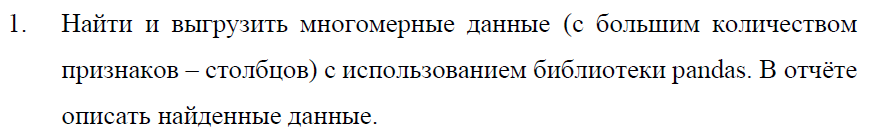

In [4]:
data = pd.read_csv('spotify_churn_dataset.csv')

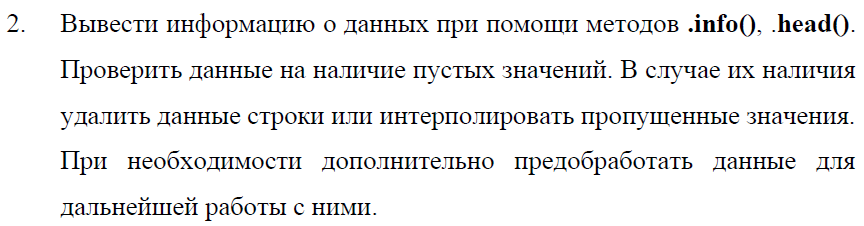

Данный датасет содержит информацию о пользователях Spotify, включая демографические данные, поведение при прослушивании, тип подписки и использование устройства, с целью прогнозирования того, уйдет ли пользователь или останется активным.

Столбцы (атрибуты):

    - **user_id** - Уникальный идентификатор для каждого пользователя

    - **gender** - Пол пользователя (Male/Female/Other)

    - **age** - Возраст пользователя

    - **country** - Местоположение пользователя

    - **subscription_type** - Тип подписки Spotify (Free, Premium, Family, Student)

    - **listening_time** - Минуты, потраченные на прослушивание в день

    - **songs_played_per_day** - Количество песен, проигрываемых ежедневно

    - **skip_rate** - Процент пропущенных песен

    - **device_type** - Используемое устройство (мобильное устройство, настольное устройство, веб-браузер)

    - **ads_listened_per_week** - Количество прослушанных объявлений в неделю

    - **offline_listening** - Минуты прослушивания офлайн

    - **is_churned** - Целевая переменная (0 = Active, 1 = Churned)

In [5]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB
None


user_id  gender  age country subscription_type  listening_time  \
0        1  Female   54      CA              Free              26   
1        2   Other   33      DE            Family             141   
2        3    Male   38      AU           Premium             199   
3        4  Female   22      CA           Student              36   
4        5   Other   29      US            Family             250   

   songs_played_per_day  skip_rate device_type  ads_listened_per_week  \
0                    23       0.20     Desktop                     31   
1                    62       0.34         Web                      0   
2                    38       0.04      Mobile                      0   
3                     2       0.31      Mobile                      0   
4                    57       0.36      Mobile                      0   

   offline_listening  is_churned  
0                  0           1  
1                  1           0  
2                  1           1  
3                  1           0  
4                  1           1

In [6]:
data.isna().sum()

user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

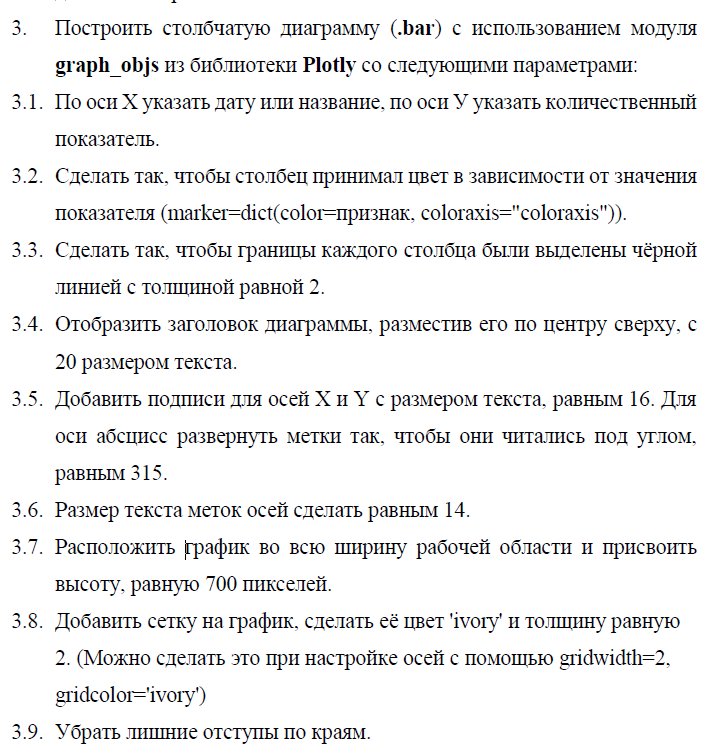

In [7]:
listen_data = data.groupby('country')['listening_time'].median().sort_values()
fig = go.Figure()
fig.add_trace(go.Bar(
    x=listen_data.index, y=listen_data.values,
    marker=dict(
        color=listen_data.values, coloraxis='coloraxis',
        line=dict(color='black', width=2),
    )))

fig.update_layout(
    title={
        'text' : 'Среднее время прослушивания музыки в разных странах',
        'font_size': 20
    },
    xaxis = dict(title='Страны', title_font_size=16, tickfont={'size': 14}, tickangle=315, gridcolor='ivory', gridwidth=2),
    yaxis = dict(title='Среднее время прослушивания', title_font_size=16, tickfont={'size': 14}),
    width=None, height=700,
    margin=dict(l=0, r=0, t=40, b=0)
                 )
fig.show()

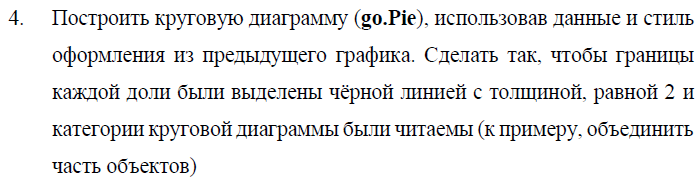

In [8]:
age_bins = [15, 20, 30, 40, 50, 60]
age_labels = ['младше 20 лет', '20-29 лет', '30-39 лет', '40-49 лет', '50 лет и старше']
age_groups = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)
age_listen_data = data.groupby(age_groups, observed=True)['listening_time'].median()
fig_pie = go.Figure()
fig_pie.add_trace(go.Pie(
    labels=age_listen_data.index, values=age_listen_data.values,
    marker=dict(line=dict(color='black', width=2)),
    textinfo='label+percent'
    ))
fig_pie.update_layout(
    title={
        'text' : 'Среднее время прослушивания музыки в зависимости от возраста',
        'font_size': 20
    })
fig_pie.show()

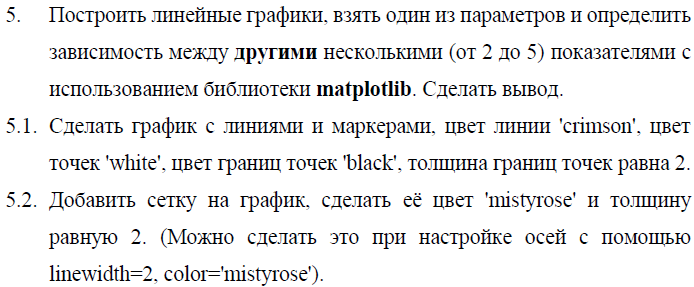

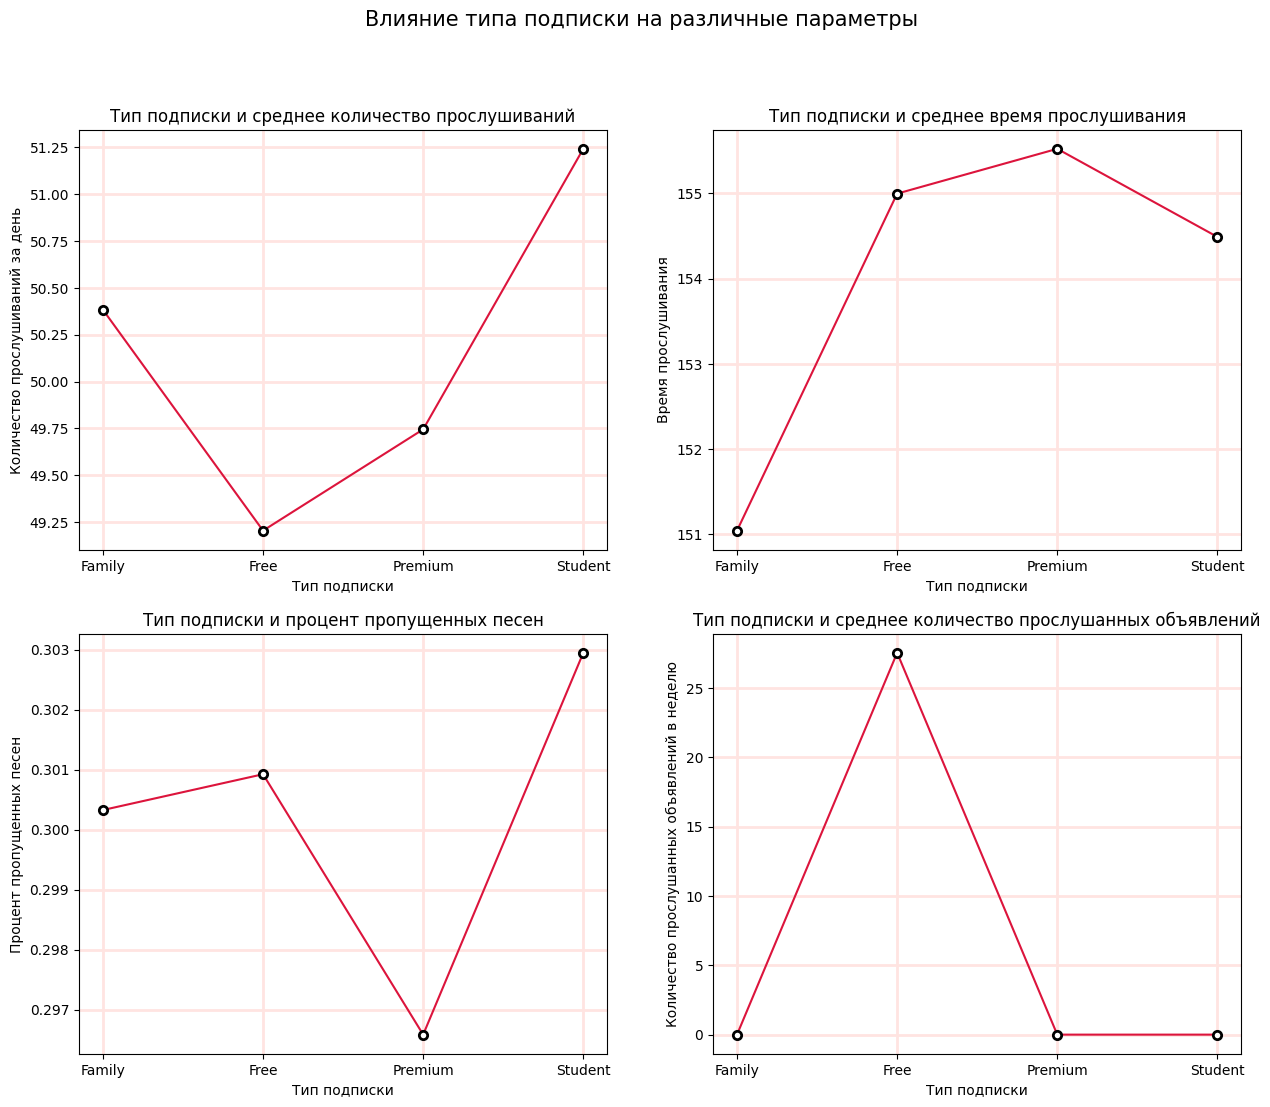

In [9]:
lin_fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
lin_fig.suptitle('Влияние типа подписки на различные параметры', fontsize=15)

sub_data = data.groupby('subscription_type').mean(numeric_only=True).reset_index()
ax1.plot(sub_data['subscription_type'], sub_data['songs_played_per_day'], marker="o", color='crimson', mec='black', mew=2, mfc='white')
ax1.set_xlabel('Тип подписки')
ax1.set_ylabel('Количество прослушиваний за день')
ax1.set_title('Тип подписки и cреднее количество прослушиваний')
ax1.grid(True, color='mistyrose', linewidth=2)

ax2.plot(sub_data['subscription_type'], sub_data['listening_time'], marker="o", color='crimson', mec='black', mew=2, mfc='white')
ax2.set_xlabel('Тип подписки')
ax2.set_ylabel('Время прослушивания')
ax2.set_title('Тип подписки и cреднее время прослушивания')
ax2.grid(True, color='mistyrose', linewidth=2)

ax3.plot(sub_data['subscription_type'], sub_data['skip_rate'], marker="o", color='crimson', mec='black', mew=2, mfc='white')
ax3.set_xlabel('Тип подписки')
ax3.set_ylabel('Процент пропущенных песен')
ax3.set_title('Тип подписки и процент пропущенных песен')
ax3.grid(True, color='mistyrose', linewidth=2)

ax4.plot(sub_data['subscription_type'], sub_data['ads_listened_per_week'], marker="o", color='crimson', mec='black', mew=2, mfc='white')
ax4.set_xlabel('Тип подписки')
ax4.set_ylabel('Количество прослушанных объявлений в неделю')
ax4.set_title('Тип подписки и cреднее количество прослушанных объявлений')
ax4.grid(True, color='mistyrose', linewidth=2)
plt.show()

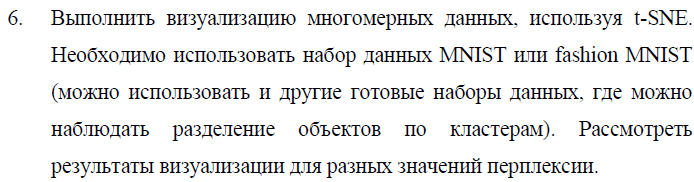

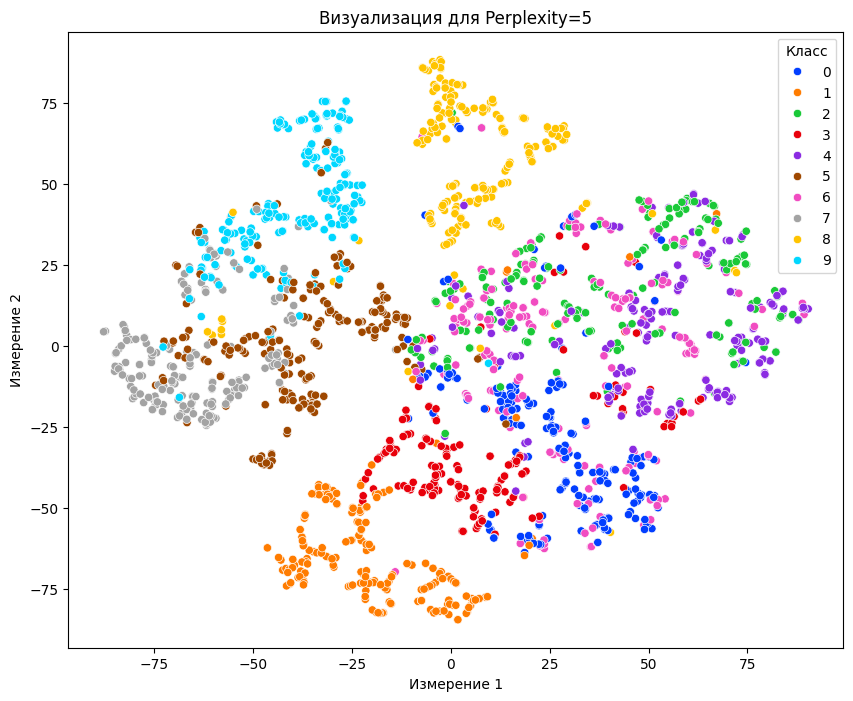

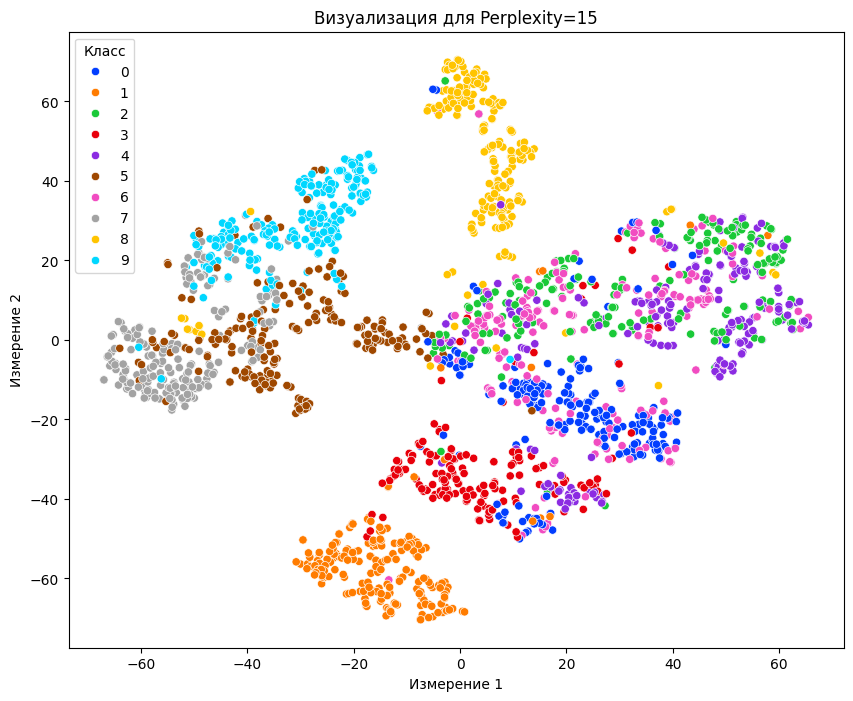

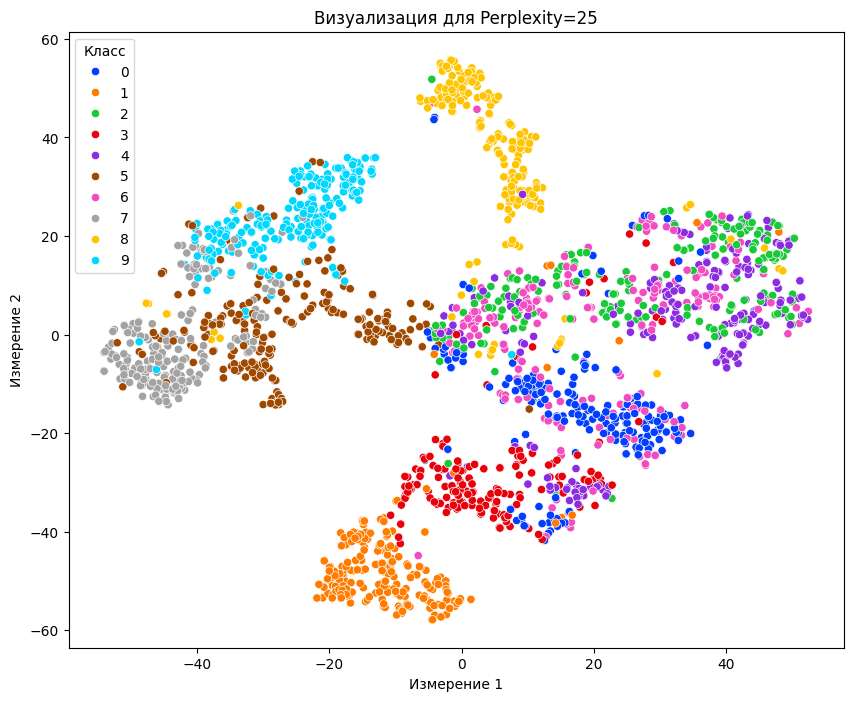

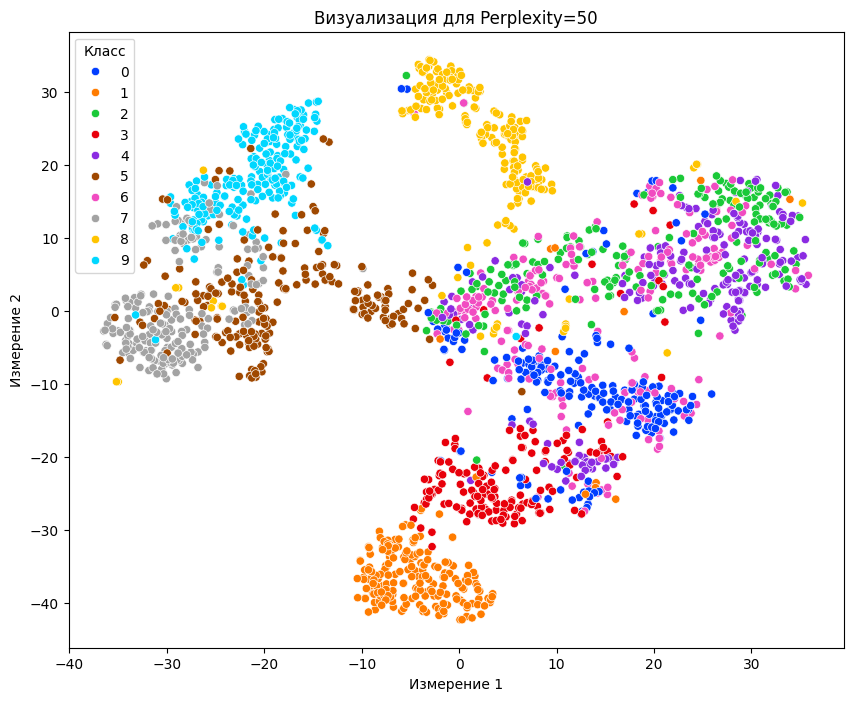

In [12]:
fashion_mnist = fetch_openml('Fashion-MNIST', version=1, as_frame=False)
X, y = fashion_mnist.data, fashion_mnist.target.astype(int)
x_train, x_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

X = pd.DataFrame(data=np.concatenate([x_train_flat, x_test_flat], axis=0))
y_combined = np.concatenate([y_train, y_test], axis=0)

scaler = preprocessing.MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

sample_size = min(2000, len(x_scaled))
indices = np.random.choice(len(x_scaled), sample_size, replace=False)
x_sample = x_scaled.iloc[indices]
y_sample = y_combined[indices]

perplexities = [5, 15, 25, 50]
tsne_time = []
for perplexity in perplexities:
    if perplexity >= len(x_sample):
        continue  # Пропускаем если perplexity слишком большой

    start_time = time.time()
    T = TSNE(n_components=2, perplexity=perplexity, random_state=123)
    tsne_features = T.fit_transform(x_sample)
    end_time = time.time()
    tsne_time.append(end_time - start_time)
    t_data = x_sample.copy()
    t_data['x'] = tsne_features[:, 0]
    t_data['y'] = tsne_features[:, 1]
    t_data['label'] = y_sample

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='x', y='y', hue='label', data=t_data, palette='bright')
    plt.title(f'Визуализация для Perplexity={perplexity}')
    plt.xlabel('Измерение 1')
    plt.ylabel('Измерение 2')
    plt.legend(title='Класс')
    plt.show()

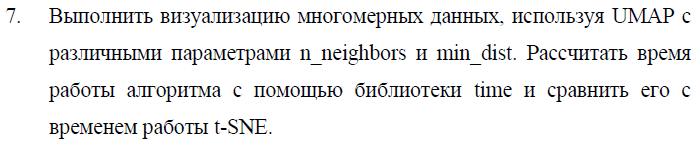

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



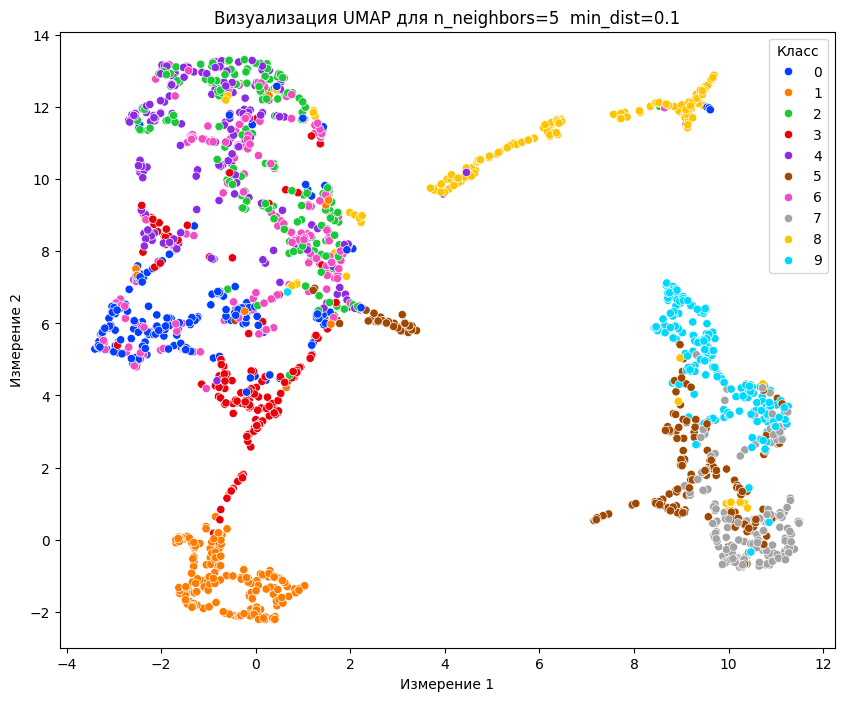

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



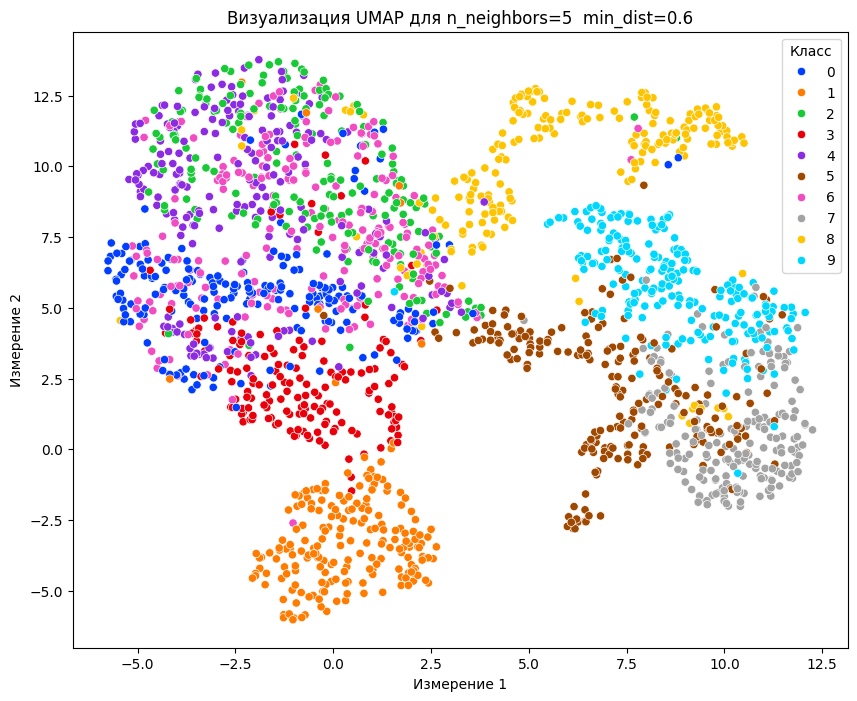

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



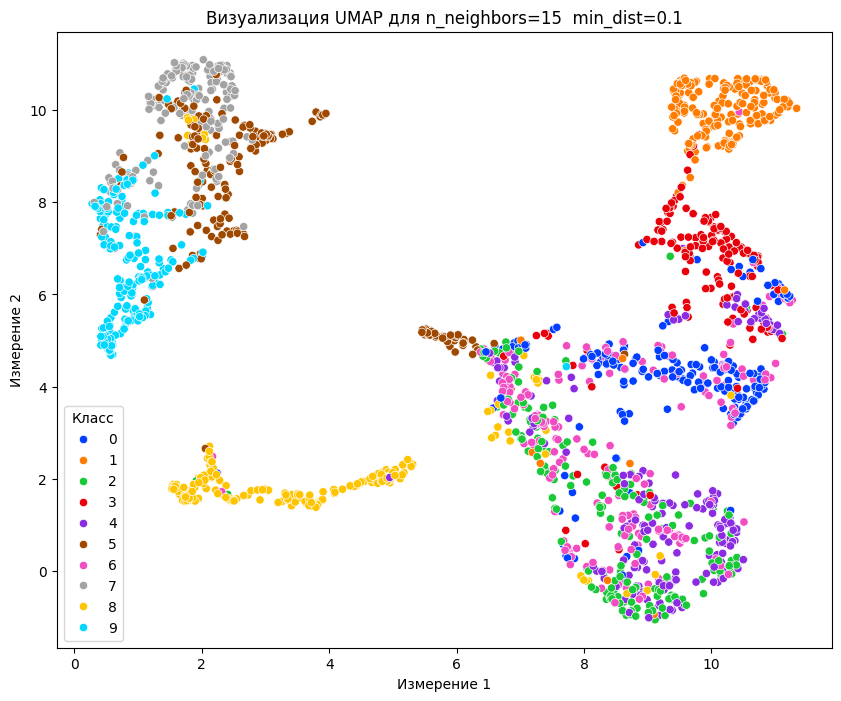

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



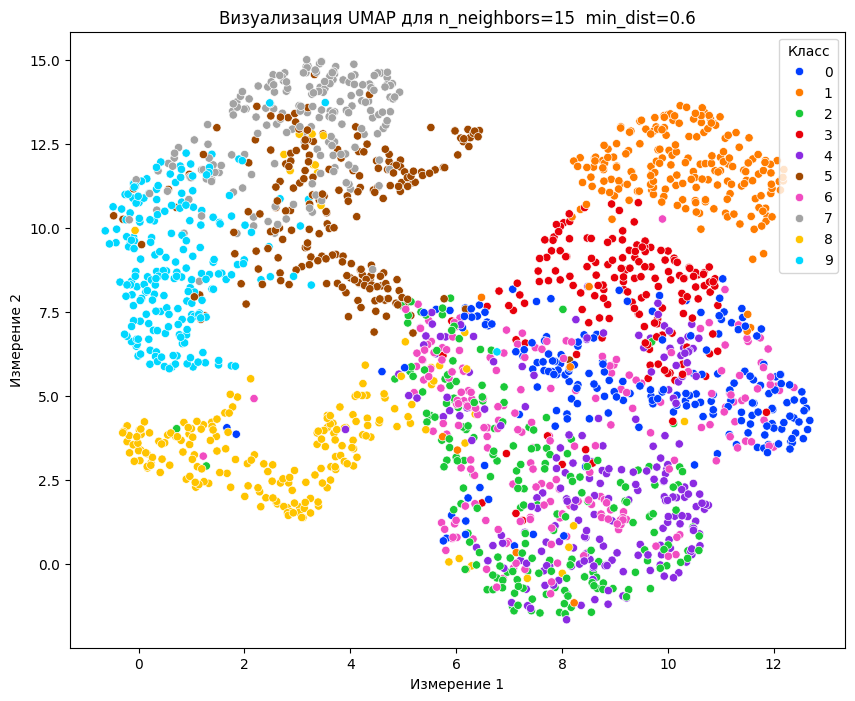

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



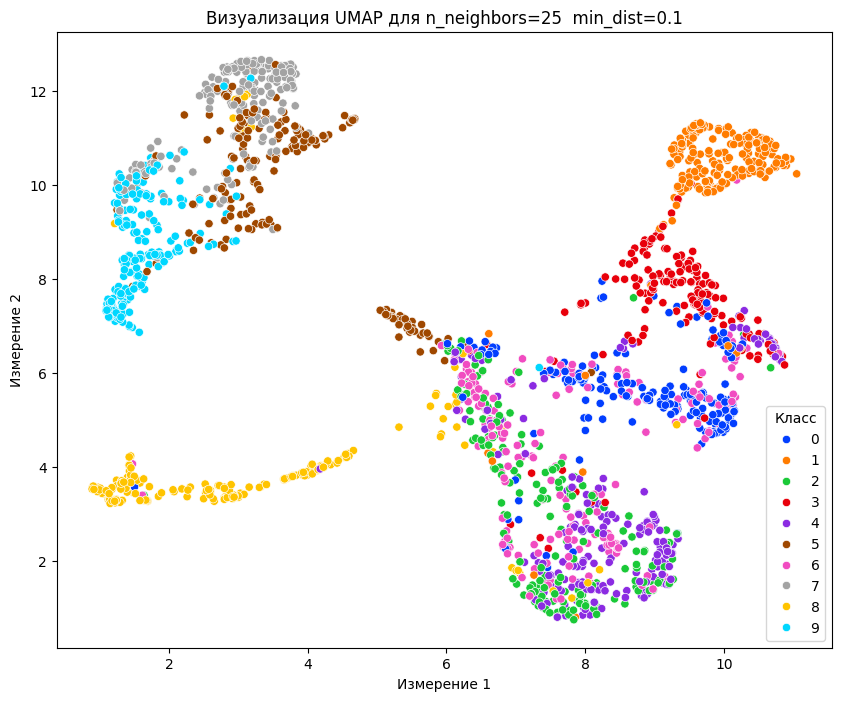

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



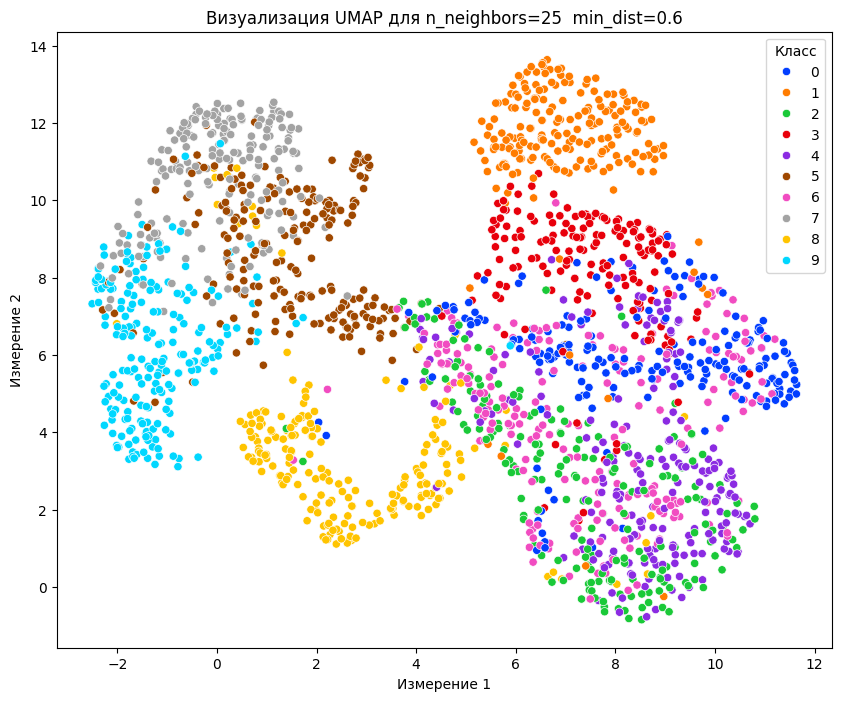

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



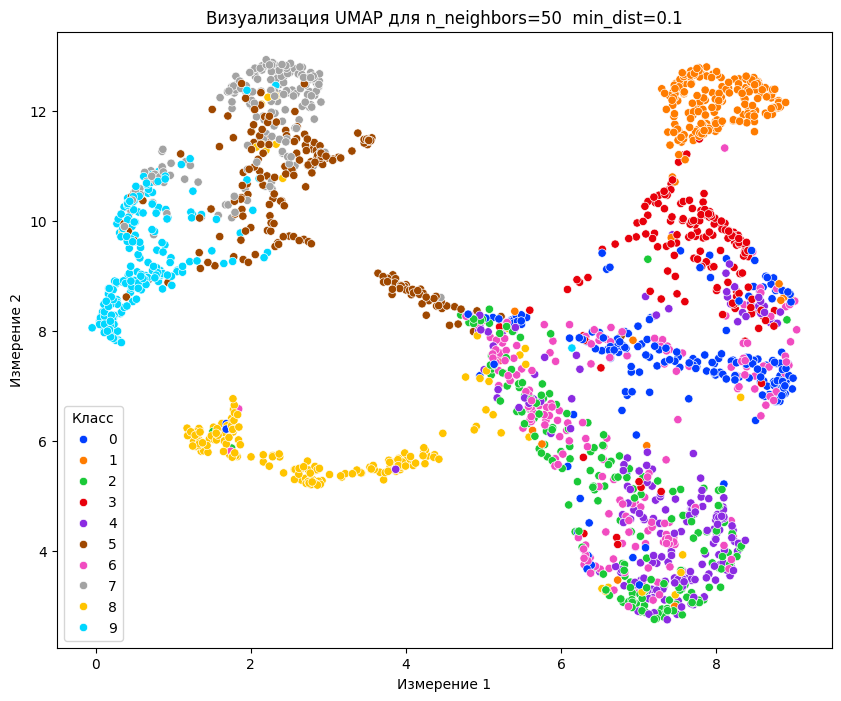

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



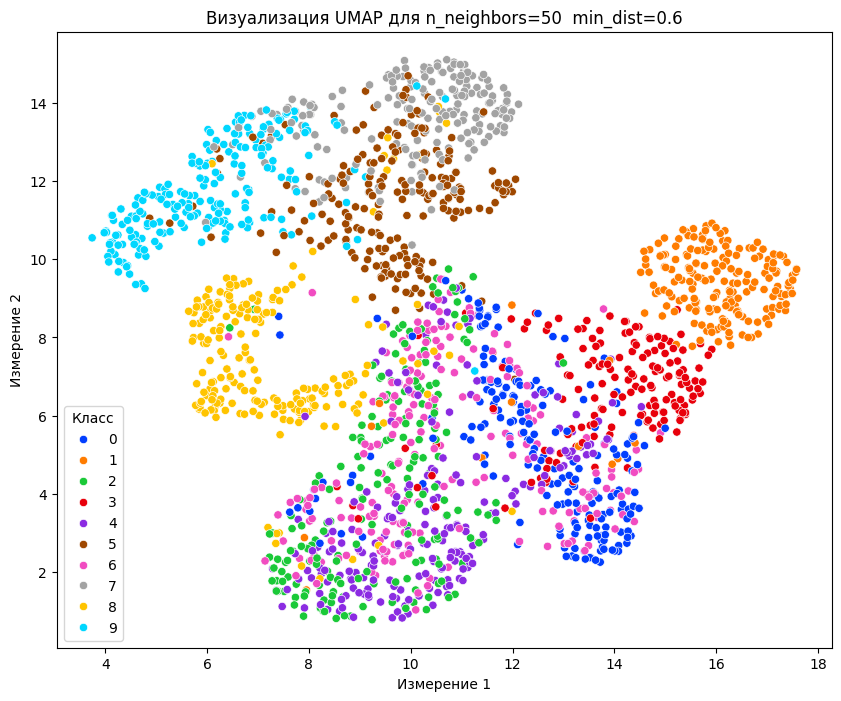

algorithm                    parametrs  time (s)
    t-SNE                 Perplexity=5 26.766191
    t-SNE                Perplexity=15 25.366462
    t-SNE                Perplexity=25 32.262306
    t-SNE                Perplexity=50 34.400400
     UMAP  n_neighbors=5, min_dist=0.1 12.684029
     UMAP  n_neighbors=5, min_dist=0.6  7.398425
     UMAP n_neighbors=15, min_dist=0.1  8.450992
     UMAP n_neighbors=15, min_dist=0.6  7.699811
     UMAP n_neighbors=25, min_dist=0.1  9.539552
     UMAP n_neighbors=25, min_dist=0.6  9.238450
     UMAP n_neighbors=50, min_dist=0.1 10.246433
     UMAP n_neighbors=50, min_dist=0.6  9.863717


In [23]:
import time, umap
n_n = [5, 15, 25, 50]
m_d = [0.1, 0.6]

umap_time = []
for n in n_n:
  for md in m_d:
    start_time = time.time()
    U = umap.UMAP(n_components=2, n_neighbors=n, min_dist=md, random_state=123)
    umap_features = U.fit_transform(x_sample)
    end_time = time.time()
    umap_time.append((n, md, end_time - start_time))

    u_data = pd.DataFrame()
    u_data['x'] = umap_features[:, 0]
    u_data['y'] = umap_features[:, 1]
    u_data['label'] = y_sample

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='x', y='y', hue='label', data=u_data, palette='bright')
    plt.title(f'Визуализация UMAP для n_neighbors={n}  min_dist={md}')
    plt.xlabel('Измерение 1')
    plt.ylabel('Измерение 2')
    plt.legend(title='Класс')
    plt.show()


tsne_data = pd.DataFrame({
    'algorithm': ['t-SNE'] * len(perplexities),
    'parametrs': [f'Perplexity={p}' for p in perplexities if p < len(x_sample)],
    'time (s)': [t for p, t in zip(perplexities, tsne_time) if p < len(x_sample)]
})
umap_data = pd.DataFrame({
    'algorithm': ['UMAP'] * len(umap_time),
    'parametrs': [f'n_neighbors={n}, min_dist={md}' for n, md, _ in umap_time],
    'time (s)': [t for _, _, t in umap_time]
})
time_table = pd.concat([tsne_data, umap_data], ignore_index=True)
print(time_table.to_string(index=False))
# print('Время для алгоритма t-SNE', [f'{p}: {t:.2f}' for p, t in zip(perplexities, tsne_time) if p < len(x_sample)])
# print('Время для алгоритма UMAP', [f'n_neighbors={n}, min_dist={md}: {t:.2f}' for m, md, t in umap_time])